# Pentathlon: Next Product to Buy Models

* Team-lead GitHub userid: rsm-xyz123
* Group name:
* Team member names:
    - Siena Lindsay 
    - Devanshi Patel
    - Zeyu Chen
    - Nishmita Vasant

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [3]:
# show dataset description
rsm.md("data/pentathlon_nptb_description.md")

## Pentathon: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "female": Gender identity coded as Female "yes" or "no"
* "income": Income in Euros, rounded to the nearest EUR5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within two days of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

> Note: In addition to the six message groups, a seventh group of customers received no promotional e-mails for the duration of the test ("control").

In [4]:
# show the content another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")

```python
lrc = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb},
    rvar="buyer",
    lev="yes",
    evar=["message", "age"]
)
lrc.summary()
```

In [5]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR     OR%  coefficient  std.error  z.value p.value     
Intercept           0.013  -98.7%        -4.34      0.034 -126.939  < .001  ***
message[control]    0.946   -5.4%        -0.06      0.032   -1.718   0.086    .
message[endurance]  1.109   10.9%         0.10      0.031    3.307  < .001  ***
message[racquet]    0.965   -3.5%        -0.04      0.032   -1.121   0.262     
message[strength]   1.063    6.3%         0.06      0.032    1.945   0.052    .
message[team]       1.024    2.4%         0.02      0.032    0.755    0.45     
message[water]      1.037    3.7%         0.04      0.032    1.146   0.252     
age[30 to 44]       2.421  142.1%         0.88      0.030   29.315  < .001  ***
age[45 to 59]       2.159  115.9% 

In [6]:
# importing functions from a module/package
from utils import functions

functions.example()



You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [7]:
## Question answers
pentathlon_nptb.columns

Index(['custid', 'buyer', 'total_os', 'message', 'age', 'female', 'income',
       'education', 'children', 'freq_endurance', 'freq_strength',
       'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet',
       'training'],
      dtype='object')

# Logistic Regression Model

## Question 1: LR Model
For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.

In [8]:
evars = pentathlon_nptb.columns.to_list()
evars = evars[evars.index("message"):]
evars = evars[:evars.index("freq_racquet")+1]
evars

['message',
 'age',
 'female',
 'income',
 'education',
 'children',
 'freq_endurance',
 'freq_strength',
 'freq_water',
 'freq_team',
 'freq_backcountry',
 'freq_racquet']

In [9]:
ivars=[f"{e}:message" for e in evars if e != "message"]
ivars

['age:message',
 'female:message',
 'income:message',
 'education:message',
 'children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [10]:
lr = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training == 1]},
    rvar="buyer",
    lev="yes",
    evar=evars,
    ivar=ivars,
)
lr.summary()

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                                        OR      OR%  coefficient  std.error  z.value p.value     
Intercept                            0.000  -100.0%        -8.25      0.153  -53.948  < .001  ***
message[control]                     1.115    11.5%         0.11      0.220    0.496    0.62     
message[endurance]                   1.199    19.9%         0.18      0.213    0.850   0.395     
message[racquet]                     1.084     8.4%         0.08      0.217    0.370   0.711     
message[strength]                    0.959    -4.1%        -0.04      0.216   -0.195   0.846     
message[team]                        0.881 

In [11]:
pentathlon_nptb["p_endurance"] = lr.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_strength"] = lr.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_water"] = lr.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb["p_team"] = lr.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_backcountry"] = lr.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_racquet"] = lr.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_control"] = lr.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,freq_backcountry,freq_racquet,training,p_endurance,p_strength,p_water,p_team,p_backcountry,p_racquet,p_control
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0,1,1.0,0.015682,0.015452,0.012604,0.012008,0.011131,0.014499,0.012022
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0,0,0.0,0.006014,0.005475,0.004981,0.005279,0.005556,0.005858,0.004605
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,2,2,1.0,0.013884,0.009343,0.009680,0.009533,0.010718,0.008789,0.009140
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0,0,1.0,0.002970,0.002196,0.002389,0.002264,0.002339,0.002089,0.002252
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,2,2,0.0,0.019675,0.011463,0.011437,0.011119,0.011526,0.012039,0.010784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0,0,1.0,0.003217,0.002089,0.002042,0.001946,0.001947,0.002118,0.001966
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0,1,0.0,0.007731,0.008117,0.005832,0.007692,0.007884,0.008257,0.006959
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1,2,1.0,0.011345,0.009822,0.008286,0.008225,0.010062,0.008976,0.008535
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0,1,0.0,0.006971,0.007284,0.005272,0.006796,0.007164,0.007352,0.006378


In [12]:
pentathlon_nptb["to_message"] = pentathlon_nptb[["p_endurance", "p_strength", "p_water", "p_team", "p_backcountry", "p_racquet", "p_control"]].idxmax(axis=1)

In [13]:
repl = {"p_endurance": "endurance", "p_strength": "strength", "p_water": "water", "p_team": "team", "p_backcountry": "backcountry", "p_racquet": "racquet", "p_control": "control"}

pentathlon_nptb["to_message"] = pentathlon_nptb[["p_endurance", "p_strength", "p_water", "p_team", "p_backcountry", "p_racquet", "p_control"]].idxmax(axis=1).map(repl)

Our approach outlined in the code leverages logistic regression to analyze customer data and predict purchasing behavior. It begins with creating interaction terms with the 'message' feature. A logistic model is then trained to forecast the likelihood of a customer buying given different messages. Using these predictions, the model determines the most effective message for each customer, optimizing for the highest probability of purchase, which can be used to tailor future marketing campaigns for improved customer response rates.

## Question 2 : LR Model
For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages.

In [14]:
pentathlon_nptb["p_max"] = pentathlon_nptb[["p_endurance", "p_strength", "p_water", "p_team", "p_backcountry", "p_racquet", "p_control"]].max(axis=1)

In [15]:
pentathlon_nptb.to_message.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message
endurance      69.97%
strength       20.22%
racquet          6.9%
water           1.19%
team            0.94%
backcountry     0.79%
control          0.0%
Name: proportion, dtype: object

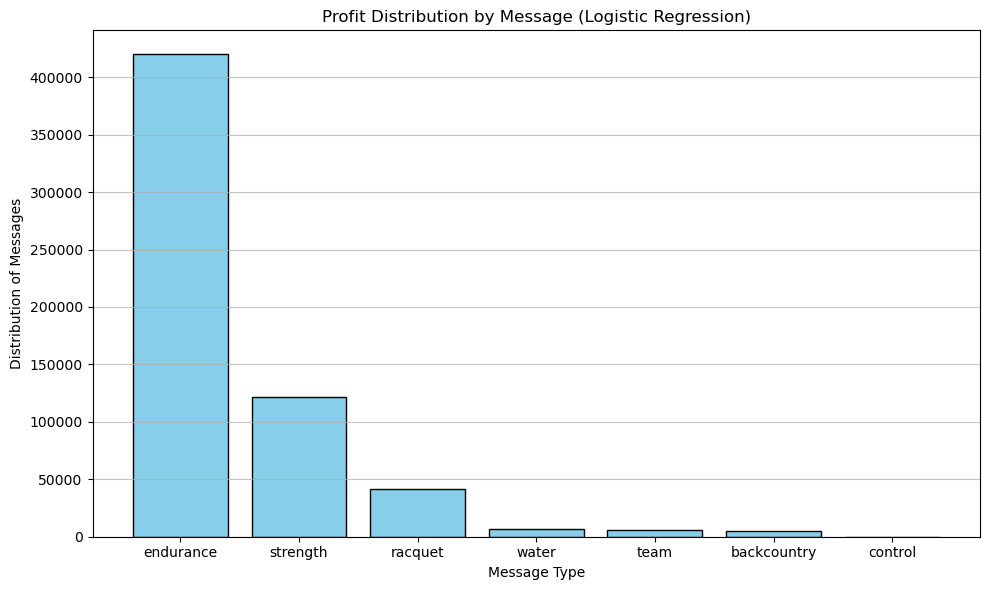

In [16]:
message_counts = pentathlon_nptb['to_message'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message (Logistic Regression)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

the 'endurance' message appears to dominate, suggesting that it resonates with a large segment of customers, potentially leading to higher profits. Other messages, like 'strength', 'racquet', 'water', 'team', 'backcountry', and 'control', have significantly lower distributions, indicating they might be less effective or relevant for the majority of customers. The visual suggests that tailoring messages towards 'endurance' may yield the best response in terms of profit, whereas other messages might need to be re-evaluated or better targeted to specific customer segments to increase their effectiveness.

## Question 3 : LR Model
For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team,  backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.
- make a model to predict the order size
- calculate the expected profit for each message

In [17]:
lr_ordersize = rsm.regress(
    data={"pentathlon_nptb": pentathlon_nptb[(pentathlon_nptb.buyer == "yes") & (pentathlon_nptb.training == 1)]},
    rvar="total_os",
    evar=evars,
    ivar=ivars
)

lr_ordersize.summary(vif=True)

Linear regression (OLS)
Data                 : pentathlon_nptb
Response variable    : total_os
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on total_os is zero
Alt. hyp.: the effect of x on total_os is not zero

                                     coefficient  std.error  t.value p.value     
Intercept                                 -9.616      8.976   -1.071   0.284     
message[control]                          17.412     12.953    1.344   0.179     
message[endurance]                         9.106     12.058    0.755    0.45     
message[racquet]                           4.179     12.822    0.326   0.745     
message[strength]                          1.414     12.601    0.112   0.911     
message[team]                             10.566     12.573    0.840   0.401     
message[water]                             6.659     12.905    0.516   0.

In [18]:
pentathlon_nptb["pred_ordersize_endurance"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["pred_ordersize_strength"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["pred_ordersize_water"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb["pred_ordersize_team"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["pred_ordersize_backcountry"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["pred_ordersize_racquet"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["pred_ordersize_control"] = lr_ordersize.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]


In [19]:
pentathlon_nptb["ep_endurance"] = pentathlon_nptb["pred_ordersize_endurance"] * pentathlon_nptb["p_endurance"] * 0.4

In [20]:
pentathlon_nptb["ep_endurance"] = pentathlon_nptb["pred_ordersize_endurance"] * pentathlon_nptb["p_endurance"] * 0.4
pentathlon_nptb["ep_strength"] = pentathlon_nptb["pred_ordersize_strength"] * pentathlon_nptb["p_strength"] * 0.4
pentathlon_nptb["ep_water"] = pentathlon_nptb["pred_ordersize_water"] * pentathlon_nptb["p_water"] * 0.4
pentathlon_nptb["ep_team"] = pentathlon_nptb["pred_ordersize_team"] * pentathlon_nptb["p_team"] * 0.4
pentathlon_nptb["ep_backcountry"] = pentathlon_nptb["pred_ordersize_backcountry"] * pentathlon_nptb["p_backcountry"] * 0.4
pentathlon_nptb["ep_racquet"] = pentathlon_nptb["pred_ordersize_racquet"] * pentathlon_nptb["p_racquet"] * 0.4
pentathlon_nptb["ep_control"] = pentathlon_nptb["pred_ordersize_control"] * pentathlon_nptb["p_control"] * 0.4


In [21]:
repl={"ep_endurance": "endurance", "ep_strength": "strength", "ep_water": "water", "ep_team": "team", "ep_backcountry": "backcountry", "ep_racquet": "racquet", "ep_control": "control"}
pentathlon_nptb["to_message_ep"] = pentathlon_nptb[["ep_endurance", "ep_strength", "ep_water", "ep_team", "ep_backcountry", "ep_racquet", "ep_control"]].idxmax(axis=1).map(repl)

The approach to predict the order size and calculate expected profit involves these steps:

Regression Analysis: A linear regression model (lr_ordersize) is trained using data of confirmed buyers (buyer == "yes"). The dependent variable is the total order size (total_os), and explanatory variables and interactions are used to predict the order size.

Prediction of Order Size: Using the trained model, we predict the order size for each customer across different messages (endurance, strength, water, team, backcountry, racquet, control). This is done by changing the message variable in the model to each type and generating predictions.

Calculation of Expected Profit (ep_): The predicted order size for each message type is then multiplied by the probability of purchase (p_message) and the profit margin (40%, as COGS is 60%). This results in the expected profit for each message type per customer.

Maximization: To find the message leading to the highest expected profit for each customer, we compare the expected profits (ep_) across all message types and select the one with the highest value.

The final output will show, for each customer, the message type that is predicted to maximize their probability of purchase and hence expected profit. The expected profit is a product of the predicted order size, the likelihood of purchase given the message, and the profit margin.

## Question 4 : LR Model
Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [22]:
pentathlon_nptb.to_message_ep.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_ep
endurance      40.86%
backcountry    16.69%
team           15.63%
racquet        13.42%
water           6.94%
strength         4.6%
control         1.87%
Name: proportion, dtype: object

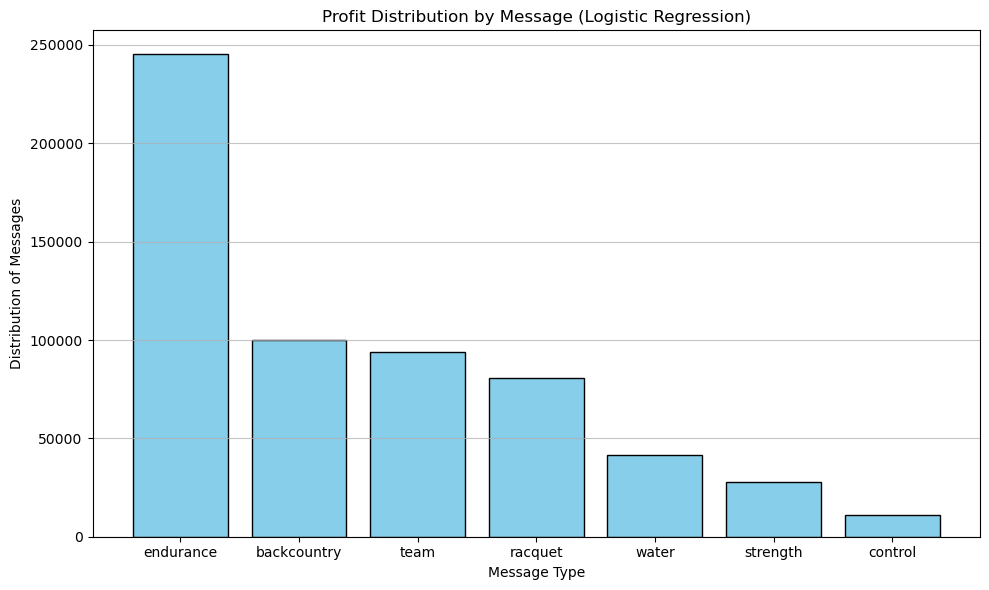

In [23]:
import matplotlib.pyplot as plt

message_counts = pentathlon_nptb['to_message_ep'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message (Logistic Regression)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

 'endurance' is the clear front-runner in effectiveness, whereas 'strength' lags significantly behind. Middle-performing messages like 'backcountry' and 'team' suggest targeted appeal, while 'control', 'racquet', and 'water' are less impactful. This suggests varying customer preferences and highlights the importance of message optimization in marketing strategies.

## Question 5: LR Model
What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the message to each customer? Include no-message as an option as well.

In [24]:
pentathlon_nptb["ep_max"] = pentathlon_nptb[["ep_endurance", "ep_strength", "ep_water", "ep_team", "ep_backcountry", "ep_racquet", "ep_control"]].max(axis=1)

In [25]:
average_profit_customer = pentathlon_nptb.ep_max.mean()

print(f"The average profit per customer is: {average_profit_customer:.2f}")

The average profit per customer is: 0.70


## Question 6: LR Model
What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team,backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [26]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ["ep_endurance", "ep_strength", "ep_water", "ep_team", "ep_backcountry", "ep_racquet", "ep_control", "ep_max"]].agg("mean").sort_values(ascending=False).apply(rsm.format_nr, sym="$", dec=2)

ep_max             $0.7
ep_endurance      $0.63
ep_water           $0.6
ep_strength        $0.6
ep_backcountry    $0.59
ep_team           $0.54
ep_racquet        $0.52
ep_control        $0.43
dtype: object

Given the expected profit values per e-mailed customer for each message type, sending an 'endurance' message would yield the highest profit of $0.63 per customer. Messages related to 'water' and 'strength' are tied at $0.6, indicating they are slightly less profitable but still effective. 'Backcountry' and 'team' messages generate lower expected profits of $0.59 and $0.54, respectively, while 'racquet' messages are the least effective of the specific messages at $0.52. Notably, the 'control' group, representing no message sent, results in the lowest expected profit of $0.43 per customer.

This distribution suggests that targeted messages are generally more profitable than sending no message at all, with 'endurance' being the most lucrative. However, the relatively close profit margins across the different messages indicate a nuanced customer base with diverse preferences, emphasizing the need for strategic message targeting to maximize overall profitability.

## Question 7: LR Model
What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?  

In [27]:
import numpy as np

categories = ["endurance", "strength", "water", "team", "backcountry", "racquet", "control"]
np.random.seed(42)

pentathlon_nptb['message_rnd'] = np.random.choice(categories, size=len(pentathlon_nptb))

average_profit_customer_rnd = pentathlon_nptb.groupby('message_rnd')['ep_max'].mean()

In [28]:
pentathlon_nptb['ep_rnd'] = pentathlon_nptb.apply(lambda row: row[f'ep_{row["message_rnd"]}'], axis=1)

average_profit_customer_rnd = pentathlon_nptb.ep_rnd.mean()
    
print(f"The average expected profit per customer when assigning messages randomly is: ${average_profit_customer_rnd:.2f}")

The average expected profit per customer when assigning messages randomly is: $0.56


In [29]:
profit_logit = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max"].agg("mean") * 5000000

profit_rnd = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_rnd"].agg("mean") * 5000000

profit_difference = profit_logit - profit_rnd

print(f"The difference in expected profit between the logit model and the random model is: ${profit_difference:.2f}")

The difference in expected profit between the logit model and the random model is: $722784.32


## Question 8: LR Model
For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)? 

In [30]:
# Profit for customizing messages using the logit model
profit_logit = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max"].agg("mean") * 5000000

# Profit for sending same message to all customers
profit_same = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_endurance"].agg("mean") * 5000000

# Profit for sending random messages
profit_rnd = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_rnd"].agg("mean") * 5000000

# Profit for sending no messages (i.e. the control)
profit_control = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control"].agg("mean") * 5000000



In [31]:
compare_performance = pd.DataFrame({
    "logit": [profit_logit],
    "same": [profit_same],
    "random": [profit_rnd],
    "control": [profit_control]
}).T.reset_index().rename(columns={"index": "strategy", 0: "total_profit"})

# Calculate the difference in profit between each strategy and the logit strategy
compare_performance["diff_logit"] = compare_performance["total_profit"] - compare_performance["total_profit"].iloc[0]

# Calculate the percentage difference in profit between each strategy and the logit strategy
compare_performance["perc_diff_logit"] = (compare_performance["diff_logit"] / compare_performance["total_profit"].iloc[0] * 100).apply(lambda x: f"{x:.2f}%")

compare_performance


,strategy,total_profit,diff_logit,perc_diff_logit
0,logit,3.522495e+06,0.000000e+00,0.00%
1,same,3.134701e+06,-3.877949e+05,-11.01%
2,random,2.799711e+06,-7.227843e+05,-20.52%
3,control,2.152438e+06,-1.370057e+06,-38.89%


# Neural Network Model

## Question 1: NN Model
For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.

In [32]:
# Base neural network model with one hidden layer of 1 node
nn1 = rsm.model.mlp(
    data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training==1]},
    rvar="buyer",
    lev="yes",
    evar=evars,
    hidden_layer_sizes=(1,),
    mod_type="classification",
)
nn1.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.884

Raw data             :
  message      age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team 30 to 44     no   55000         19       0.8               0              4           0          4                 0             1
endurance 45 to 59    yes   45000         33       0.

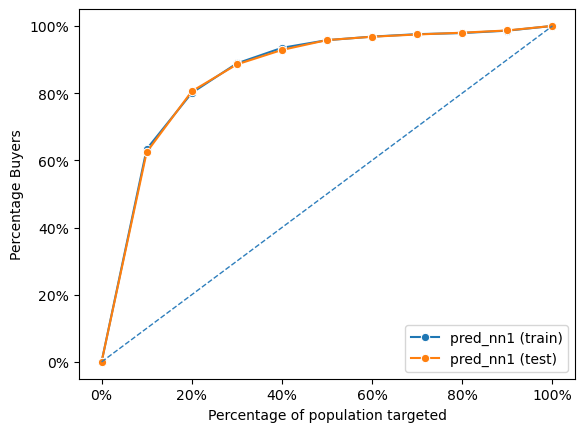

In [33]:
# Create new column for the predicted probabilities from the neural network model 1
pentathlon_nptb["pred_nn1"] = nn1.predict(pentathlon_nptb)["prediction"]

dct = {"train": pentathlon_nptb[pentathlon_nptb.training == 1], "test": pentathlon_nptb[pentathlon_nptb.training == 0]}

# Create gains plot for the neural network model 1 train and test data to check for overfitting
fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_nn1")

In [34]:
# Neural network model with two hidden layers of 12 and 8 nodes
nn12_12 = rsm.model.mlp(
    data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training==1]},
    rvar="buyer",
    lev="yes",
    evar=evars,
    hidden_layer_sizes=(12,12),
    mod_type="classification",
    learning_rate_init=0.001,
    solver="adam",
    activation="tanh",
)

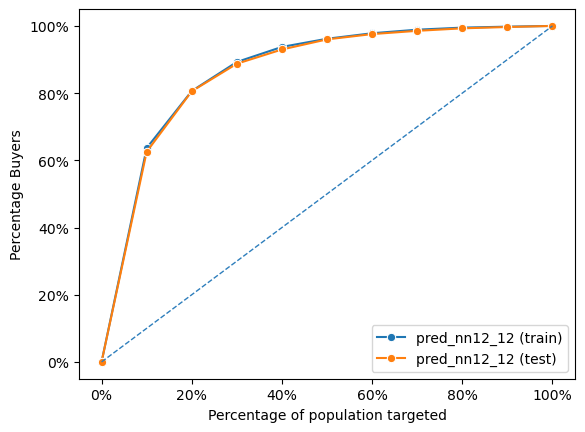

In [35]:
# Create new column for the predicted probabilities from the neural network model 10
pentathlon_nptb["pred_nn12_12"] = nn12_12.predict(pentathlon_nptb)["prediction"]

dct = {"train": pentathlon_nptb[pentathlon_nptb.training == 1], "test": pentathlon_nptb[pentathlon_nptb.training == 0]}
    
# Create gains plot for the neural network model 10 train and test data to check for overfitting
fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_nn12_12")

In [36]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    "hidden_layer_sizes": [(8,2), (10,), (10,2), (12,), (12,12)],
    "alpha": [0.01, 0.001, 0.0001],
}

# Define the scoring metric
scoring = {"AUC": "roc_auc"}

# Create the GridSearchCV object
clf_cv = GridSearchCV(
    estimator=nn1.fitted, 
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=4,
    refit="AUC",
    verbose=5,
    return_train_score=True,
)

# Fit the GridSearchCV object
clf_cv.fit(nn1.data_onehot, nn1.data.buyer)

# Create a DataFrame with the results
cv_results_df = pd.DataFrame(clf_cv.cv_results_)

# Select and sort the results to display
results_to_display = cv_results_df.loc[:, [
    "mean_train_AUC", 
    "mean_test_AUC",  
    "rank_test_AUC"
]].sort_values("rank_test_AUC")

print(results_to_display)

best_hyperparameters = clf_cv.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
    mean_train_AUC  mean_test_AUC  rank_test_AUC
11        0.891985       0.889714              1
6         0.891997       0.889672              2
1         0.891926       0.889504              3
8         0.891988       0.889289              4
13        0.891943       0.889279              5
3         0.891825       0.889249              6
4         0.893394       0.888584              7
14        0.893957       0.888248              8
7         0.889547       0.888044              9
2         0.889647       0.887959             10
12        0.889546       0.887855             11
9         0.894220       0.887712             12
0         0.886417       0.884663             13
10        0.886342       0.884598             14
5         0.886630       0.884345             15
Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}


In [37]:
# Final neural network model with the best hyperparameters from the grid search - one hidden layer of 10 nodes, alpha of 0.0001
nn_final = rsm.model.mlp(
    data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training==1]},
    rvar="buyer",
    lev="yes",
    evar=evars,
    mod_type="classification",
    learning_rate_init=0.001,
    solver="adam",
    activation="tanh",
    **clf_cv.best_params_
)

nn_final.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (10,)
Activation function  : tanh
Solver               : adam
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.891

Raw data             :
  message      age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team 30 to 44     no   55000         19       0.8               0              4           0          4                 0             1
endurance 45 to 59    yes   45000         33       0.

In [38]:
pentathlon_nptb["p_endurance_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_strength_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_water_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb["p_team_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_backcountry_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_racquet_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_control_nn"] = nn_final.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,ep_rnd,pred_nn1,pred_nn12_12,p_endurance_nn,p_strength_nn,p_water_nn,p_team_nn,p_backcountry_nn,p_racquet_nn,p_control_nn
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.121358,0.012438,0.011452,0.012506,0.012395,0.012218,0.012369,0.010264,0.012556,0.011130
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.076910,0.003623,0.002043,0.002442,0.002391,0.002272,0.002304,0.002015,0.002411,0.002247
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.212843,0.009892,0.008484,0.008140,0.007136,0.006946,0.007430,0.007303,0.006580,0.006818
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.024983,0.001449,0.000918,0.002513,0.001184,0.000911,0.000854,0.001446,0.001218,0.001123
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.292381,0.010817,0.009376,0.009863,0.007802,0.006767,0.007411,0.007228,0.006806,0.007007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0.045158,0.001358,0.001500,0.006714,0.002447,0.001739,0.001677,0.003332,0.002372,0.002592
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.109818,0.005533,0.003829,0.005795,0.005500,0.004473,0.005122,0.004459,0.005317,0.004924
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,0.151322,0.007333,0.004094,0.007956,0.006623,0.007140,0.006725,0.006762,0.006513,0.006515
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.091192,0.004790,0.002397,0.004920,0.004533,0.003725,0.004125,0.003646,0.004284,0.004069


In [39]:
pentathlon_nptb["to_message_nn"] = pentathlon_nptb[["p_endurance_nn", "p_strength_nn", "p_water_nn", "p_team_nn", "p_backcountry_nn", "p_racquet_nn", "p_control_nn"]].idxmax(axis=1)

repl = {"p_endurance_nn": "endurance", "p_strength_nn": "strength", "p_water_nn": "water", "p_team_nn": "team", "p_backcountry_nn": "backcountry", "p_racquet_nn": "racquet", "p_control_nn": "control"}

pentathlon_nptb["to_message_nn"] = pentathlon_nptb[["p_endurance_nn", "p_strength_nn", "p_water_nn", "p_team_nn", "p_backcountry_nn", "p_racquet_nn", "p_control_nn"]].idxmax(axis=1).map(repl)

Our methodology employed neural network analysis to interpret customer data and anticipate purchase behaviors. Initially, we established a baseline model consisting of a single node and one hidden layer. To evaluate the model's performance and identify the threshold where overfitting begins, we expanded the complexity to 12 nodes with two hidden layers. Following this, we applied GridSearchCV to fine-tune the architecture, which identified the optimal configuration as 10 nodes within a single hidden layer.

The refined neural network model was then trained to calculate the probability of a customer making a purchase in response to various messages. These probabilistic predictions enabled the model to ascertain the most impactful message for each individual customer. By focusing on maximizing purchase likelihood, this approach allows for the personalization of marketing strategies to enhance customer engagement and optimize response rates in future campaigns.

## Question 2 : NN Model
For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages.

In [40]:
pentathlon_nptb["p_max_nn"] = pentathlon_nptb[["p_endurance_nn", "p_strength_nn", "p_water_nn", "p_team_nn", "p_backcountry_nn", "p_racquet_nn", "p_control_nn"]].max(axis=1)

pentathlon_nptb.to_message_nn.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_nn
endurance      87.65%
water           6.02%
racquet         4.24%
strength        1.71%
team            0.36%
backcountry     0.02%
Name: proportion, dtype: object

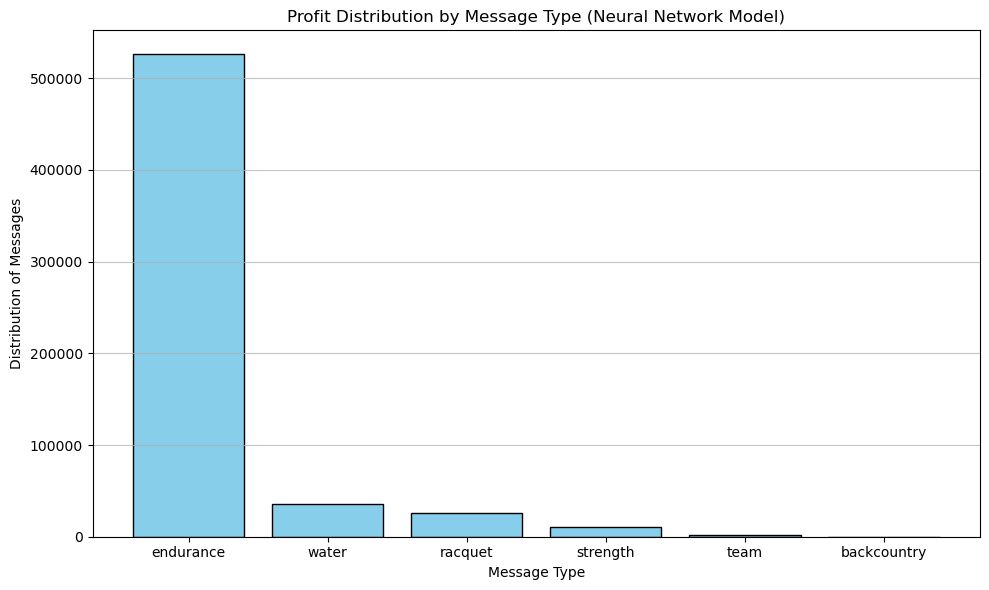

In [41]:
message_counts = pentathlon_nptb['to_message_nn'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message Type (Neural Network Model)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

The 'endurance' message appears to dominate, suggesting that it resonates with a large segment of customers, potentially leading to higher profits. Other messages, like 'strength', 'racquet', 'water', 'team', 'backcountry', and 'control', have significantly lower distributions, indicating they might be less effective or relevant for the majority of customers. The visual suggests that tailoring messages towards 'endurance' may yield the best response in terms of profit, whereas other messages might need to be re-evaluated or better targeted to specific customer segments to increase their effectiveness.

## Question 3 : NN Model
For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team,  backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

In [42]:
pentathlon_nptb["ep_endurance_nn"] = pentathlon_nptb["pred_ordersize_endurance"] * pentathlon_nptb["p_endurance_nn"] * 0.4
pentathlon_nptb["ep_strength_nn"] = pentathlon_nptb["pred_ordersize_strength"] * pentathlon_nptb["p_strength_nn"] * 0.4
pentathlon_nptb["ep_water_nn"] = pentathlon_nptb["pred_ordersize_water"] * pentathlon_nptb["p_water_nn"] * 0.4
pentathlon_nptb["ep_team_nn"] = pentathlon_nptb["pred_ordersize_team"] * pentathlon_nptb["p_team_nn"] * 0.4
pentathlon_nptb["ep_backcountry_nn"] = pentathlon_nptb["pred_ordersize_backcountry"] * pentathlon_nptb["p_backcountry_nn"] * 0.4
pentathlon_nptb["ep_racquet_nn"] = pentathlon_nptb["pred_ordersize_racquet"] * pentathlon_nptb["p_racquet_nn"] * 0.4
pentathlon_nptb["ep_control_nn"] = pentathlon_nptb["pred_ordersize_control"] * pentathlon_nptb["p_control_nn"] * 0.4

In [43]:
repl={"ep_endurance_nn": "endurance", "ep_strength_nn": "strength", "ep_water_nn": "water", "ep_team_nn": "team", "ep_backcountry_nn": "backcountry", "ep_racquet_nn": "racquet", "ep_control_nn": "control"}
pentathlon_nptb["to_message_ep_nn"] = pentathlon_nptb[["ep_endurance_nn", "ep_strength_nn", "ep_water_nn", "ep_team_nn", "ep_backcountry_nn", "ep_racquet_nn", "ep_control_nn"]].idxmax(axis=1).map(repl)

The approach to predict the order size and calculate expected profit is the same as the logistic regression model. It involves these steps

Regression Analysis: A linear regression model (lr_ordersize) is trained using data of confirmed buyers (buyer == "yes"). The dependent variable is the total order size (total_os), and explanatory variables and interactions are used to predict the order size.

Prediction of Order Size: Using the trained model, we predict the order size for each customer across different messages (endurance, strength, water, team, backcountry, racquet, control). This is done by changing the message variable in the model to each type and generating predictions.

Calculation of Expected Profit (ep_): The predicted order size for each message type is then multiplied by the probability of purchase (p_message) and the profit margin (40%, as COGS is 60%). This results in the expected profit for each message type per customer.

Maximization: To find the message leading to the highest expected profit for each customer, we compare the expected profits (ep_) across all message types and select the one with the highest value.

The final output will show, for each customer, the message type that is predicted to maximize their probability of purchase and hence expected profit. The expected profit is a product of the predicted order size, the likelihood of purchase given the message, and the profit margin.

## Question 4 : NN Model
Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [44]:
pentathlon_nptb.to_message_ep_nn.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_ep_nn
endurance      46.38%
water          15.88%
team           14.34%
racquet         8.19%
backcountry     7.99%
control         6.27%
strength        0.96%
Name: proportion, dtype: object

In [45]:
pentathlon_nptb["ep_max_nn"] = pentathlon_nptb[["ep_endurance_nn", "ep_strength_nn", "ep_water_nn", "ep_team_nn", "ep_backcountry_nn", "ep_racquet_nn", "ep_control_nn"]].max(axis=1)

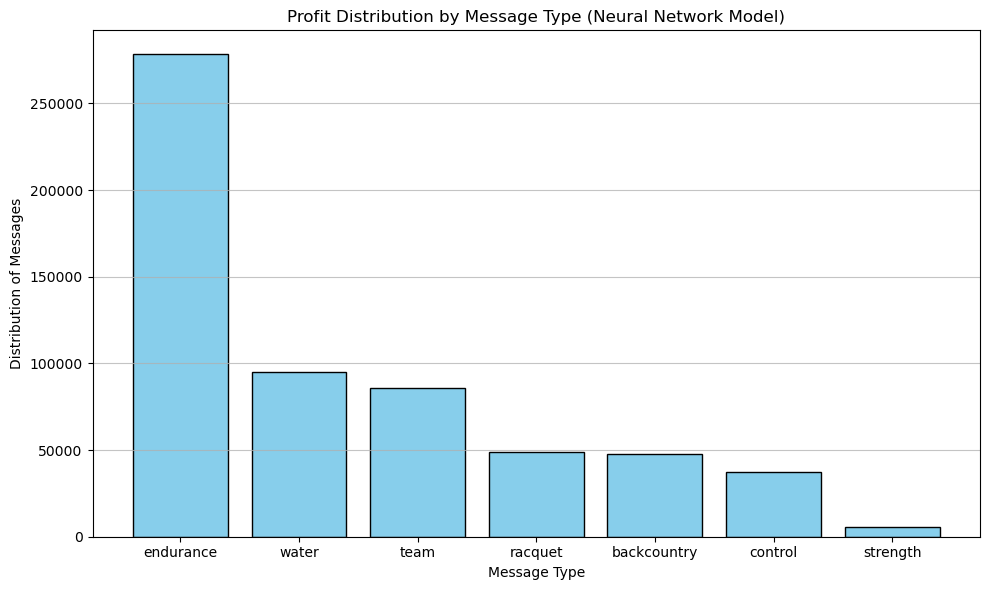

In [46]:
message_counts = pentathlon_nptb['to_message_ep_nn'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message Type (Neural Network Model)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

 'endurance' is the clear front-runner in effectiveness, whereas 'strength' lags significantly behind. Middle-performing messages like 'racquet' and 'team' suggest targeted appeal, while 'control', 'backcountry', and 'water' are less impactful. This suggests varying customer preferences and highlights the importance of message optimization in marketing strategies.

## Question 5: NN Model
What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the message to each customer? Include no-message as an option as well.

In [47]:
average_profit_customer_nn = pentathlon_nptb.ep_max_nn.mean()

print(f"The average profit per customer for the neural network model is ${average_profit_customer_nn:.2f}")

The average profit per customer for the neural network model is $0.76


## Question 6: NN Model
What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team,backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [48]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ["ep_endurance_nn", "ep_strength_nn", "ep_water_nn", "ep_team_nn", "ep_backcountry_nn", "ep_racquet_nn", "ep_control_nn", "ep_max_nn"]].agg("mean").sort_values(ascending=False).apply(rsm.format_nr, sym="$", dec=2)

ep_max_nn            $0.77
ep_endurance_nn      $0.69
ep_water_nn          $0.67
ep_backcountry_nn    $0.66
ep_strength_nn       $0.62
ep_team_nn           $0.59
ep_racquet_nn        $0.56
ep_control_nn        $0.47
dtype: object

With the revised expected profit values per e-mailed customer for each message type, the 'endurance' message remains the most profitable, now at $0.69 per customer. The 'water' message follows closely at $0.67, and 'backcountry' not far behind at $0.66, both suggesting strong effectiveness. 'Strength' and 'team' messages yield lower expected profits of $0.62 and $0.59, respectively, while 'racquet' messages are at $0.56. The 'control' group, which does not receive any message, generates an expected profit of $0.47 per customer.

The updated distribution reinforces that specific, targeted messages drive higher profits compared to no communication, with 'endurance' outperforming other categories. While there is a clear hierarchy in message profitability, the differences between them are not drastic, highlighting a customer base with varied interests. This underscores the importance of a tailored marketing approach that aligns message type with customer preference to enhance profitability.

## Question 7: NN Model
What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?

In [49]:
pentathlon_nptb['ep_rnd_nn'] = pentathlon_nptb.apply(lambda row: row[f'ep_{row["message_rnd"]}_nn'], axis=1)

average_profit_customer_rnd_nn = pentathlon_nptb.ep_rnd_nn.mean()
    
print(f"The average expected profit per customer when assigning messages randomly using the neural network model is: ${average_profit_customer_rnd_nn:.2f}")

The average expected profit per customer when assigning messages randomly using the neural network model is: $0.61


## Question 8: NN Model
For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?

In [50]:
# Profit for customizing messages using the logit model
profit_nn = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_nn"].agg("mean") * 5000000

# Profit for sending same message to all customers
profit_same_nn = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_endurance_nn"].agg("mean") * 5000000

# Profit for sending random messages
profit_rnd_nn = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_rnd_nn"].agg("mean") * 5000000

# Profit for sending no messages (i.e. the control)
profit_control_nn = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control_nn"].agg("mean") * 5000000

In [51]:
compare_performance_nn = pd.DataFrame({
    "nn": [profit_nn],
    "same": [profit_same_nn],
    "random": [profit_rnd_nn],
    "control": [profit_control_nn]
}).T.reset_index().rename(columns={"index": "strategy", 0: "total_profit"})

# Calculate the difference in profit between each strategy and the logit strategy
compare_performance_nn["diff_nn"] = compare_performance_nn["total_profit"] - compare_performance_nn["total_profit"].iloc[0]

# Calculate the percentage difference in profit between each strategy and the logit strategy
compare_performance_nn["perc_diff_nn"] = (compare_performance_nn["diff_nn"] / compare_performance_nn["total_profit"].iloc[0] * 100).apply(lambda x: f"{x:.2f}%")

compare_performance_nn


,strategy,total_profit,diff_nn,perc_diff_nn
0,nn,3.836402e+06,0.000000e+00,0.00%
1,same,3.453419e+06,-3.829831e+05,-9.98%
2,random,3.052056e+06,-7.843465e+05,-20.44%
3,control,2.358137e+06,-1.478265e+06,-38.53%


# Random Forest Model

## Question 1: RF Model
For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
pentathlon_nptb['buyer_yes'] = pentathlon_nptb.buyer.map({'yes': 1, 'no': 0})
pentathlon_nptb['female_yes'] = pentathlon_nptb.female.map({'yes': 1, 'no': 0})

In [54]:
pentathlon_nptb = pd.concat([pentathlon_nptb, pd.get_dummies(pentathlon_nptb['age'], prefix='age')], axis=1)
pentathlon_nptb.rename(columns={'age_< 30':'age_less_30', 'age_30 to 44':'age_30_to_44', 'age_45 to 59':'age_45_to_59', 'age_>= 60':'age_greater_60'}, inplace=True)
pentathlon_nptb = pd.concat([pentathlon_nptb, pd.get_dummies(pentathlon_nptb['message'], prefix='m')], axis=1)

In [55]:
pentathlon_nptb['age_less_30'] = pentathlon_nptb['age_less_30'].map({True: 1, False: 0})
pentathlon_nptb['age_30_to_44'] = pentathlon_nptb['age_30_to_44'].map({True: 1, False: 0})
pentathlon_nptb['age_45_to_59'] = pentathlon_nptb['age_45_to_59'].map({True: 1, False: 0})
pentathlon_nptb['age_greater_60'] = pentathlon_nptb['age_greater_60'].map({True: 1, False: 0})
pentathlon_nptb['m_backcountry'] = pentathlon_nptb['m_backcountry'].map({True: 1, False: 0})
pentathlon_nptb['m_control'] = pentathlon_nptb['m_control'].map({True: 1, False: 0})
pentathlon_nptb['m_endurance'] = pentathlon_nptb['m_endurance'].map({True: 1, False: 0})
pentathlon_nptb['m_racquet'] = pentathlon_nptb['m_racquet'].map({True: 1, False: 0})
pentathlon_nptb['m_strength'] = pentathlon_nptb['m_strength'].map({True: 1, False: 0})
pentathlon_nptb['m_team'] = pentathlon_nptb['m_team'].map({True: 1, False: 0})
pentathlon_nptb['m_water'] = pentathlon_nptb['m_water'].map({True: 1, False: 0})

In [56]:
evars_rf= [
 'female_yes',
 'income',
 'education',
 'children',
 'freq_endurance',
 'freq_strength',
 'freq_water',
 'freq_team',
 'freq_backcountry',
 'freq_racquet',
 'age_less_30',
 'age_30_to_44',
 'age_45_to_59',
 'age_greater_60',
 'm_backcountry',
 'm_control',
 'm_endurance',
 'm_racquet',
 'm_strength',
 'm_team',
 'm_water']

In [57]:
X_train = pentathlon_nptb[pentathlon_nptb.training == 1][evars_rf]
y_train = pentathlon_nptb[pentathlon_nptb.training == 1]["buyer_yes"]

In [58]:

clf = RandomForestClassifier()

param_grid = {
    "n_estimators": [300, 500],
    "max_features": [5, 8],
}

scoring = {"AUC": "roc_auc"}

rf_cvs = GridSearchCV(
    clf, param_grid, scoring=scoring, cv=3, n_jobs=4, refit="AUC", verbose=5
).fit(X_train, y_train)

'"\nrf_cvs = GridSearchCV(\n    clf, param_grid, scoring=scoring, cv=3, n_jobs=4, refit="AUC", verbose=5\n).fit(X_train, y_train)'

In [59]:
rf_cvs.best_params_, rf_cvs.best_score_

In [60]:
rf = rsm.model.rforest(
    data={"pentathlon_nptb": pentathlon_nptb.query("training == 1")},
    rvar="buyer_yes",
    lev=1,
    evar = evars,
    random_state=42,
    **rf_cvs.best_params_,
)
rf.summary()

Random Forest
Data                 : pentathlon_nptb
Response variable    : buyer_yes
Level                : 1
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 22)
Nr. of observations  : 420,000
max_features         : 5 (5)
n_estimators         : 500
min_samples_leaf     : 1
random_state         : 42
AUC                  : 0.859

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_< 30  age_30 to 44  age_45 to 59  age_>= 60  female_yes  female_no
  55000         19       0.8               0              4           0          4                 0             1                Fal

In [61]:
pentathlon_nptb["p_endurance_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_strength_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_water_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb["p_team_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_backcountry_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_racquet_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_control_rf"] = rf.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]

In [62]:
pentathlon_nptb["to_message_rf"] = pentathlon_nptb[["p_endurance_rf", "p_strength_rf", "p_water_rf", "p_team_rf", "p_backcountry_rf", "p_racquet_rf", "p_control_rf"]].idxmax(axis=1)

repl = {"p_endurance_rf": "endurance", "p_strength_rf": "strength", "p_water_rf": "water", "p_team_rf": "team", "p_backcountry_rf": "backcountry", "p_racquet_rf": "racquet", "p_control_rf": "control"}

pentathlon_nptb["to_message_rf"] = pentathlon_nptb[["p_endurance_rf", "p_strength_rf", "p_water_rf", "p_team_rf", "p_backcountry_rf", "p_racquet_rf", "p_control_rf"]].idxmax(axis=1).map(repl)

- For the Random Forest model, we used the same approach as the logistic regression and neural network models to predict the message that would lead to the highest probability of purchase for each customer. We trained the model using the same features and target variable, and then used the model to predict the message that would maximize the probability of purchase for each customer.

## Question 2 : RF Model
For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages.

In [63]:
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,m_team,m_water,p_endurance_rf,p_strength_rf,p_water_rf,p_team_rf,p_backcountry_rf,p_racquet_rf,p_control_rf,to_message_rf
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1,0,0.066,0.044,0.008,0.006,0.008,0.004,0.006,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0,0,0.000,0.000,0.000,0.004,0.002,0.002,0.000,team
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0,0,0.006,0.004,0.006,0.002,0.018,0.020,0.008,racquet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,endurance
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1,0,0.004,0.004,0.002,0.000,0.024,0.002,0.004,backcountry
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,1,0,0.000,0.002,0.000,0.000,0.000,0.000,0.004,control


In [64]:
pentathlon_nptb["p_max_rf"] = pentathlon_nptb[["p_endurance_rf","p_strength_rf","p_water_rf","p_team_rf","p_backcountry_rf","p_racquet_rf","p_control_rf"]].max(axis=1)

pentathlon_nptb.to_message_nn.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_nn
endurance      87.65%
water           6.02%
racquet         4.24%
strength        1.71%
team            0.36%
backcountry     0.02%
Name: proportion, dtype: object

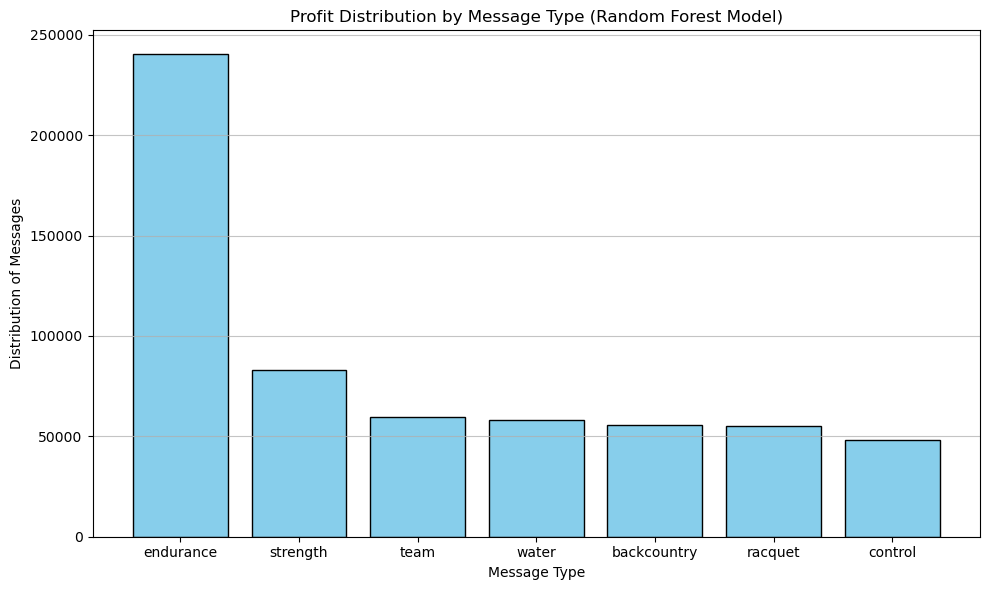

In [65]:
message_counts = pentathlon_nptb['to_message_rf'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message Type (Random Forest Model)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

- The endurace message appears to dominate, suggesting that it resonates with a large segment of customers, potentially leading to higher profits. Other messages, like strength, racquet, water, team, backcountry, and control, have significantly lower distributions, indicating they might be less effective or relevant for the majority of customers. The visual suggests that tailoring messages towards endurance may yield the best response in terms of profit, whereas other messages might need to be re-evaluated or better targeted to specific customer segments to increase their effectiveness.

## Question 3 : RF Model
For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team,  backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

In [66]:
pentathlon_nptb["ep_endurance_rf"] = pentathlon_nptb["pred_ordersize_endurance"] * pentathlon_nptb["p_endurance_rf"] * 0.4
pentathlon_nptb["ep_strength_rf"] = pentathlon_nptb["pred_ordersize_strength"] * pentathlon_nptb["p_strength_rf"] * 0.4
pentathlon_nptb["ep_water_rf"] = pentathlon_nptb["pred_ordersize_water"] * pentathlon_nptb["p_water_rf"] * 0.4
pentathlon_nptb["ep_team_rf"] = pentathlon_nptb["pred_ordersize_team"] * pentathlon_nptb["p_team_rf"] * 0.4
pentathlon_nptb["ep_backcountry_rf"] = pentathlon_nptb["pred_ordersize_backcountry"] * pentathlon_nptb["p_backcountry_rf"] * 0.4
pentathlon_nptb["ep_racquet_rf"] = pentathlon_nptb["pred_ordersize_racquet"] * pentathlon_nptb["p_racquet_rf"] * 0.4
pentathlon_nptb["ep_control_rf"] = pentathlon_nptb["pred_ordersize_control"] * pentathlon_nptb["p_control_rf"] * 0.4


In [67]:
repl = {"ep_endurance_rf": "endurance", "ep_strength_rf": "strength", "ep_water_rf": "water", "ep_team_rf": "team", "ep_backcountry_rf": "backcountry", "ep_racquet_rf": "racquet", "ep_control_rf": "control"}
pentathlon_nptb["to_message_ep_rf"] = pentathlon_nptb[["ep_endurance_rf", "ep_strength_rf", "ep_water_rf", "ep_team_rf", "ep_backcountry_rf", "ep_racquet_rf", "ep_control_rf"]].idxmax(axis=1).map(repl)

- The approach to predict the order size and calculate expected profit is the same as the logistic regression and neural network models. 

## Question 4 : RF Model
Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [68]:
pentathlon_nptb.to_message_ep_rf.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_ep_rf
endurance      38.07%
strength       11.54%
water          11.49%
backcountry     10.9%
team           10.16%
racquet         9.76%
control         8.07%
Name: proportion, dtype: object

In [69]:
pentathlon_nptb["ep_max_rf"] = pentathlon_nptb[["ep_endurance_rf", "ep_strength_rf", "ep_water_rf", "ep_team_rf", "ep_backcountry_rf", "ep_racquet_rf", "ep_control_rf"]].max(axis=1)

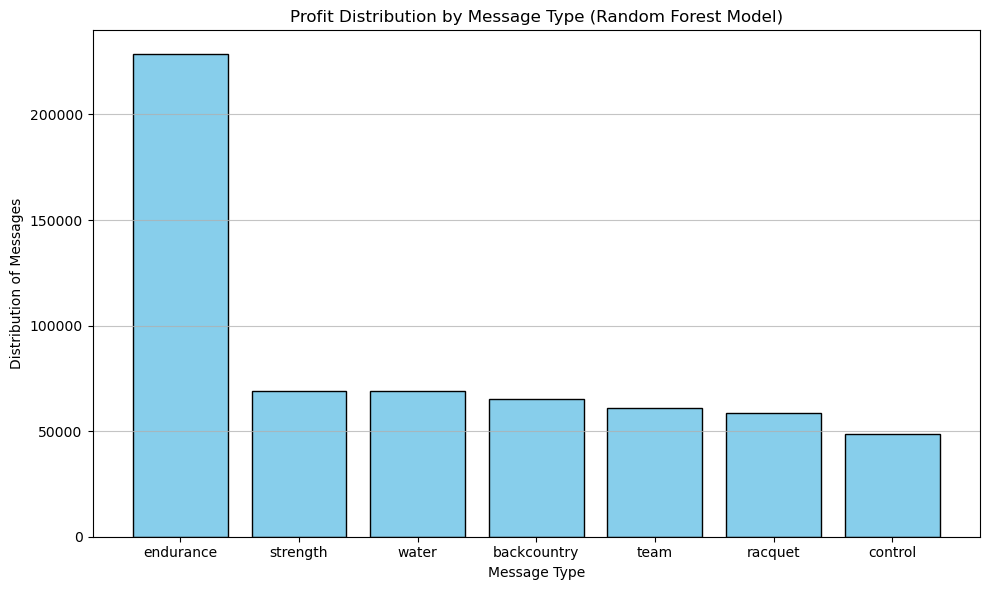

In [70]:
message_counts = pentathlon_nptb['to_message_ep_rf'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message Type (Random Forest Model)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

- The endurace message is the clear front-runner in effectiveness, whereas rest all lags significantly behind. Middle-performing messages like strength, water, backcountry ,racquet and team suggest targeted appeal, while control is less impactful. This suggests varying customer preferences and highlights the importance of message optimization in marketing strategies.

## Question 5: RF Model
What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the message to each customer? Include no-message as an option as well.

In [71]:
average_profit_customer_rf = pentathlon_nptb.ep_max_rf.mean()

print(f"The average profit per customer for the random forest model is ${average_profit_customer_rf:.2f}")

The average profit per customer for the random forest model is $1.06


## Question 6: RF Model
What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team,backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [72]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ["ep_endurance_rf", "ep_strength_rf", "ep_water_rf", "ep_team_rf", "ep_backcountry_rf", "ep_racquet_rf", "ep_control_rf", "ep_max_rf"]].agg("mean").sort_values(ascending=False).apply(rsm.format_nr, sym="$", dec=2)

ep_max_rf            $1.01
ep_water_rf          $0.66
ep_backcountry_rf    $0.66
ep_endurance_rf      $0.65
ep_strength_rf       $0.64
ep_team_rf            $0.6
ep_racquet_rf        $0.59
ep_control_rf         $0.5
dtype: object

## Question 7: RF Model
What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?

In [73]:
pentathlon_nptb['ep_rnd_rf'] = pentathlon_nptb.apply(lambda row: row[f'ep_{row["message_rnd"]}_rf'], axis=1)

average_profit_customer_rnd_rf = pentathlon_nptb.ep_rnd_rf.mean()
    
print(f"The average expected profit per customer when assigning messages randomly using the random forest model is: ${average_profit_customer_rnd_rf:.2f}")

The average expected profit per customer when assigning messages randomly using the random forest model is: $0.60


- From the Random Forest model, the 'max' message type emerges as the most lucrative, yielding an average expected profit of $1.01 per customer. The 'endurance' message type also shows a strong performance with an expected profit of $0.65 per customer. This suggests that targeting customers with these specific message types could potentially enhance the profitability of email campaigns compared to a random assignment of messages, which averages $0.60 in expected profit per customer.

## Question 8: RF Model
For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?

In [74]:
# Profit for customizing messages using the random forest model
profit_rf = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_rf"].agg("mean") * 5000000

# Profit for sending same message to all customers
profit_same_rf = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_endurance_rf"].agg("mean") * 5000000

# Profit for sending random messages
profit_rnd_rf = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_rnd_rf"].agg("mean") * 5000000

# Profit for sending no messages (i.e. the control)
profit_control_rf = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control_rf"].agg("mean") * 5000000

In [75]:
compare_performance_rf = pd.DataFrame({
    "rf": [profit_rf],
    "same": [profit_same_rf],
    "random": [profit_rnd_rf],
    "control": [profit_control_rf]
}).T.reset_index().rename(columns={"index": "strategy", 0: "total_profit"})

# Calculate the difference in profit between each strategy and the random forest strategy
compare_performance_rf["diff_rf"] = compare_performance_rf["total_profit"] - compare_performance_rf["total_profit"].iloc[0]

# Calculate the percentage difference in profit between each strategy and the random forest strategy
compare_performance_rf["perc_diff_rf"] = (compare_performance_rf["diff_rf"] / compare_performance_rf["total_profit"].iloc[0] * 100).apply(lambda x: f"{x:.2f}%")

compare_performance_rf


,strategy,total_profit,diff_rf,perc_diff_rf
0,rf,5.053514e+06,0.000000e+00,0.00%
1,same,3.257139e+06,-1.796374e+06,-35.55%
2,random,3.056232e+06,-1.997282e+06,-39.52%
3,control,2.494744e+06,-2.558770e+06,-50.63%


# XGBoost Model

## Question 1: XGBoost Model
For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.

In [76]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

df_train = pentathlon_nptb[pentathlon_nptb['training'] == 1]

X = df_train[evars]
y = df_train['buyer'].replace({'no': 0, 'yes': 1})

In [77]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)

hyperparameter_grid = {
    'n_estimators': [100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1],
    'min_child_weight': [1, 10, 100]
}

XGBoost = GridSearchCV(estimator=xgb_classifier, param_grid=hyperparameter_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
XGBoost.fit(X, y)

print("Best parameters found: ", XGBoost.best_params_)
print("Highest AUC found: ", XGBoost.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 100}
Highest AUC found:  0.8873036056977437


In [78]:
best_params = XGBoost.best_params_
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
xgb_best.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [79]:
types = ['team', 'backcountry', 'endurance', 'water', 'racquet', 'strength', 'control']

df_temp = pentathlon_nptb.copy()

for type in types:
    df_temp['message'] = pd.Categorical([type] * len(df_temp), categories=df_temp['message'].cat.categories)
    X_temp = df_temp[evars]  
    probabilities = xgb_best.predict_proba(X_temp)[:, 1]
    pentathlon_nptb[f"p_{type}_xgb"] = probabilities

In [80]:
columns = [f"p_{type}" for type in types]

pentathlon_nptb["to_message_xgb"] = pentathlon_nptb[columns].idxmax(axis=1).str.replace("p_", "", 1)

Our approach utilized XGBoost, a gradient boosting framework, to analyze customer data and predict purchasing behavior. We began by selecting a set of hyperparameters to optimize the model, starting with a conservative learning rate and examining various tree complexities and regularization parameters to strike a balance between learning efficiency and model complexity. Employing GridSearchCV with a 5-fold cross-validation, we systematically searched through the hyperparameter space, prioritizing the ROC AUC score to identify the most predictive model without overfitting.

The optimal configuration was found with a learning rate of 0.1, a tree depth of 6, and a min_child_weight of 10, leveraging 100 trees. With these parameters, the XGBoost model was trained to forecast the probability of a customer completing a purchase in response to different marketing messages.

Using the trained XGBoost model, we then calculated the likelihood of purchase for each message type, enabling us to determine the message predicted to be most effective for each customer. This predictive insight paves the way for crafting personalized marketing strategies aimed at boosting customer interaction and maximizing response rates for future campaigns. The process culminates in the selection of an optimal message for each customer, thereby tailoring the marketing efforts to individual preferences and tendencies.

## Question 2 : XGBoost Model
For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages.

In [81]:
pentathlon_nptb["p_max_xgb"] = pentathlon_nptb[columns].max(axis=1)

In [82]:
pentathlon_nptb.to_message_xgb.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_xgb
endurance      69.97%
strength       20.22%
racquet          6.9%
water           1.19%
team            0.94%
backcountry     0.79%
control          0.0%
Name: proportion, dtype: object

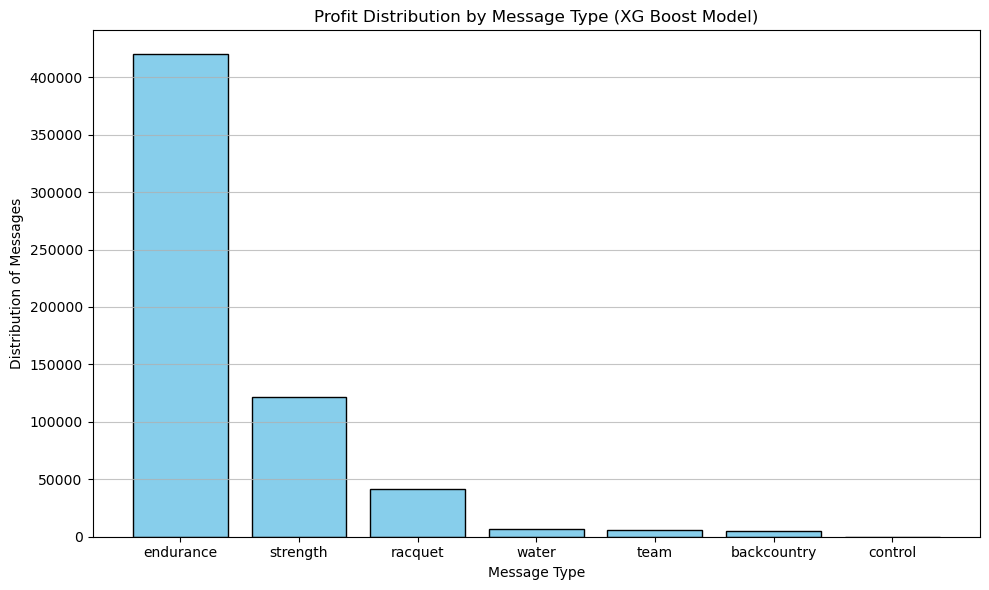

In [83]:
message_counts = pentathlon_nptb['to_message_xgb'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message Type (XG Boost Model)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

the 'endurance' message appears to dominate, suggesting that it resonates with a large segment of customers, potentially leading to higher profits. Other messages, like 'strength', 'racquet', 'water', 'team', 'backcountry', and 'control', have significantly lower distributions, indicating they might be less effective or relevant for the majority of customers. The visual suggests that tailoring messages towards 'endurance' may yield the best response in terms of profit, whereas other messages might need to be re-evaluated or better targeted to specific customer segments to increase their effectiveness.

## Question 3 : XGBoost Model
For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team,  backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

In [84]:
for type in types:
    pentathlon_nptb[f"ep_{type}_xgb"] = pentathlon_nptb[f"pred_ordersize_{type}"] * pentathlon_nptb[f"p_{type}_xgb"] * 0.4

pentathlon_nptb[:3]

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_control_xgb,to_message_xgb,p_max_xgb,ep_team_xgb,ep_backcountry_xgb,ep_endurance_xgb,ep_water_xgb,ep_racquet_xgb,ep_strength_xgb,ep_control_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.007570,endurance,0.015682,0.128338,0.123617,0.196319,0.141534,0.144061,0.135714,0.076413
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.001008,endurance,0.006014,0.015641,0.017260,0.015701,0.015511,0.013748,0.015277,0.015241
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.006790,endurance,0.013884,0.107641,0.128609,0.101901,0.088893,0.140228,0.100619,0.119662


In [85]:
types = ['team', 'backcountry', 'endurance', 'water', 'racquet', 'strength', 'control']

columns_ep = [f"ep_{type}_xgb" for type in types]

pentathlon_nptb["to_message_ep_xgb"] = pentathlon_nptb[columns_ep].idxmax(axis=1)\
                                   .str.replace("ep_", "").str.replace("_xgb", "")

display = columns_ep + ["to_message_ep_xgb"]

pentathlon_nptb[display][:5]

,ep_team_xgb,ep_backcountry_xgb,ep_endurance_xgb,ep_water_xgb,ep_racquet_xgb,ep_strength_xgb,ep_control_xgb,to_message_ep_xgb
0,0.128338,0.123617,0.196319,0.141534,0.144061,0.135714,0.076413,endurance
1,0.015641,0.017260,0.015701,0.015511,0.013748,0.015277,0.015241,backcountry
2,0.107641,0.128609,0.101901,0.088893,0.140228,0.100619,0.119662,racquet
3,0.009936,0.009436,0.016693,0.004681,0.005517,0.008444,0.008316,endurance
4,0.131277,0.124996,0.141051,0.162252,0.132742,0.126052,0.127737,water


The approach to predict the order size and calculate expected profit is the same as the logistic regression model.
The final output will show, for each customer, the message type that is predicted to maximize their probability of purchase and hence expected profit. The expected profit is a product of the predicted order size, the likelihood of purchase given the message, and the profit margin.

## Question 4 : XGBoost Model
Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [86]:
pentathlon_nptb["ep_max_xgb"] = pentathlon_nptb[[f"ep_{type}_xgb" for type in types]].max(axis=1)

pentathlon_nptb.to_message_ep_xgb.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_message_ep_xgb
endurance      40.35%
water          19.16%
team           12.02%
backcountry    10.67%
strength        7.81%
racquet         7.26%
control         2.74%
Name: proportion, dtype: object

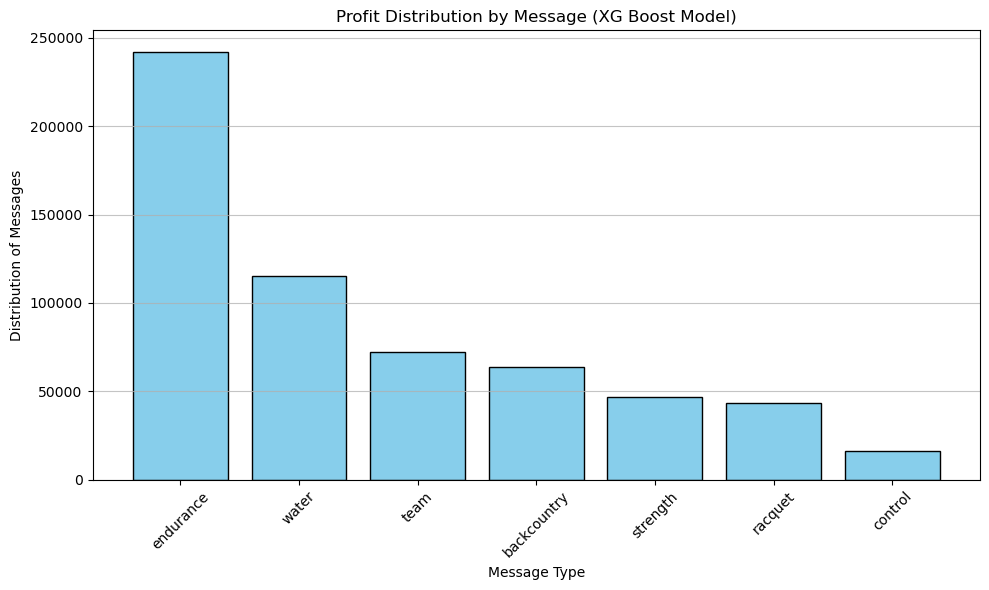

In [87]:
message_counts = pentathlon_nptb['to_message_ep_xgb'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(message_counts.index, message_counts.values, color='skyblue', edgecolor='black')
plt.title('Profit Distribution by Message (XG Boost Model)')
plt.xlabel('Message Type')
plt.ylabel('Distribution of Messages')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

 'endurance' is the clear front-runner in effectiveness, whereas 'control' lags significantly behind. Middle-performing messages like 'backcountry' and 'team' suggest targeted appeal, while 'strength', 'racquet', and 'control' are less impactful. This suggests varying customer preferences and highlights the importance of message optimization in marketing strategies.

## Question 5: XGBoost Model
What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the message to each customer? Include no-message as an option as well.

In [88]:
average_profit_customer_xgb = pentathlon_nptb.ep_max_xgb.mean()

print(f"The average profit per customer when using the XGBoost model is: ${average_profit_customer_xgb:.2f}")

The average profit per customer when using the XGBoost model is: $0.70


## Question 6: XGBoost Model
What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team,backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [89]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, [f"ep_{type}_xgb" for type in types]].agg("mean").sort_values(ascending=False).apply(rsm.format_nr, sym="$", dec=2)

ep_endurance_xgb      $0.63
ep_water_xgb          $0.61
ep_strength_xgb        $0.6
ep_backcountry_xgb    $0.59
ep_team_xgb           $0.53
ep_racquet_xgb        $0.52
ep_control_xgb        $0.43
dtype: object

## Question 7: XGBoost Model
What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?

In [90]:
pentathlon_nptb['ep_rnd_xgb'] = pentathlon_nptb.apply(lambda row: row[f'ep_{row["message_rnd"]}_xgb'], axis=1)

average_profit_customer_rnd_xgb = pentathlon_nptb.ep_rnd_xgb.mean()

print(f"The average expected profit per customer when assigning messages randomly using the XGBoost model is: ${average_profit_customer_rnd_xgb:.2f}")

The average expected profit per customer when assigning messages randomly using the XGBoost model is: $0.55



With the new expected profit values per e-mailed customer, the 'endurance' message using XGBoost modeling remains the top performer at $0.63 per customer. 'Water' and 'strength' messages are also effective, with profits of $0.61 and $0.6 respectively. 'Backcountry' sees a slight dip to $0.59, while 'team' and 'racquet' messages are less profitable at $0.53 and $0.52. The 'control' group, receiving no message, yields the lowest expected profit at $0.43 per customer.

This revised profit distribution confirms that targeted messaging is more lucrative than not sending a message, with 'endurance' leading in profitability. The modest variance in profit across different messages suggests a customer base with diverse preferences, emphasizing the value of a customized messaging strategy to maximize profit.

## Question 8: XGBoost Model
For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?

In [91]:
# Profit for customizing messages using the xgboost model
profit_xgb = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_xgb"].agg("mean") * 5000000

# Profit for sending same message to all customers using the xgboost model
profit_same_xgb = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_endurance_xgb"].agg("mean") * 5000000

# Profit for sending random messages using the xgboost model
profit_rnd_xgb = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_rnd_xgb"].agg("mean") * 5000000

# Profit for sending no messages (i.e. the control) using the xgboost model
profit_control_xgb = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control_xgb"].agg("mean") * 5000000

In [92]:
compare_performance_xgb = pd.DataFrame({
    "xgb": [profit_xgb],
    "same": [profit_same_xgb],
    "random": [profit_rnd_xgb],
    "control": [profit_control_xgb]
}).T.reset_index().rename(columns={"index": "strategy", 0: "total_profit"})

# Calculate the difference in profit between each strategy and the xgboost strategy
compare_performance_xgb["diff_xgb"] = compare_performance_xgb["total_profit"] - compare_performance_xgb["total_profit"].iloc[0]

# Calculate the percentage difference in profit between each strategy and the xgboost strategy
compare_performance_xgb["perc_diff_xgb"] = (compare_performance_xgb["diff_xgb"] / compare_performance_xgb["total_profit"].iloc[0] * 100).apply(lambda x: f"{x:.2f}%")

compare_performance_xgb

,strategy,total_profit,diff_xgb,perc_diff_xgb
0,xgb,3.520849e+06,0.000000e+00,0.00%
1,same,3.133704e+06,-3.871453e+05,-11.00%
2,random,2.787982e+06,-7.328677e+05,-20.82%
3,control,2.166327e+06,-1.354523e+06,-38.47%


## Model Performance Comparison

In [93]:
pentathlon_nptb['pred_logit'] = lr.predict(pentathlon_nptb)["prediction"]
pentathlon_nptb['pred_nn'] = nn_final.predict(pentathlon_nptb)["prediction"]
pentathlon_nptb['pred_rf'] = rf.predict(pentathlon_nptb)["prediction"]


In [94]:
pentathlon_nptb['pred_xgb'] = xgb_best.predict_proba(pentathlon_nptb[evars])[:, 1]

## Summary Statistics

In [99]:
#expected profit for all models
profits_all = pd.DataFrame({"Models": ["Logit", "Neural Network", "Random Forest", "XGBoost"],
                            "Expected Profit": [profit_logit, profit_nn, profit_rf, profit_xgb]})
profits_all["Expected Profit"] = profits_all["Expected Profit"].map("${:,.2f}".format)
profits_all

,Models,Expected Profit
0,Logit,"$3,522,495.39"
1,Neural Network,"$3,836,402.08"
2,Random Forest,"$5,053,513.94"
3,XGBoost,"$3,520,849.47"


In [100]:
#expected profit for all models per customer
average_profit_all = pd.DataFrame({"Models": ["Logit", "Neural Network", "Random Forest", "XGBoost"],
                            "Average Expected Profit per Customer": [average_profit_customer, average_profit_customer_nn, average_profit_customer_rf, average_profit_customer_xgb]})
average_profit_all["Average Expected Profit per Customer"] = average_profit_all["Average Expected Profit per Customer"].map("${:,.2f}".format)
average_profit_all

,Models,Average Expected Profit per Customer
0,Logit,$0.70
1,Neural Network,$0.76
2,Random Forest,$1.06
3,XGBoost,$0.70


In [101]:
#expected profit from rnd model, same message to all customers, and control for all models
compare_performance_all = pd.DataFrame({
    "Models": ["Logit", "Neural Network", "Random Forest", "XGBoost"],
    "Customized Messages": [profit_logit, profit_nn, profit_rf, profit_xgb],
    "Same Message to All": [profit_same, profit_same_nn, profit_same_rf, profit_same_xgb],
    "Random Messages": [profit_rnd, profit_rnd_nn, profit_rnd_rf, profit_rnd_xgb],
    "Control": [profit_control, profit_control_nn, profit_control_rf, profit_control_xgb]
})
compare_performance_all["Customized Messages"] = compare_performance_all["Customized Messages"].map("${:,.2f}".format)
compare_performance_all["Same Message to All"] = compare_performance_all["Same Message to All"].map("${:,.2f}".format)
compare_performance_all["Random Messages"] = compare_performance_all["Random Messages"].map("${:,.2f}".format)
compare_performance_all["Control"] = compare_performance_all["Control"].map("${:,.2f}".format)

compare_performance_all["Max Profit"] = compare_performance_all.iloc[:, 1:5].idxmax(axis=1)
compare_performance_all

,Models,Customized Messages,Same Message to All,Random Messages,Control,Max Profit
0,Logit,"$3,522,495.39","$3,134,700.52","$2,799,711.07","$2,152,438.03",Customized Messages
1,Neural Network,"$3,836,402.08","$3,453,418.94","$3,052,055.61","$2,358,137.44",Customized Messages
2,Random Forest,"$5,053,513.94","$3,257,139.49","$3,056,232.05","$2,494,743.70",Customized Messages
3,XGBoost,"$3,520,849.47","$3,133,704.16","$2,787,981.76","$2,166,326.68",Customized Messages


In [102]:
#highest probability of buying for all models - message type 
highest_prob_all = pd.DataFrame({"Models": ["Logit", "Neural Network", "Random Forest", "XGBoost"],
                            "Highest Probability of Buying": [pentathlon_nptb.to_message_ep.value_counts().idxmax(), pentathlon_nptb.to_message_ep_nn.value_counts().idxmax(), pentathlon_nptb.to_message_ep_rf.value_counts().idxmax(), pentathlon_nptb.to_message_ep_xgb.value_counts().idxmax()]})
highest_prob_all

,Models,Highest Probability of Buying
0,Logit,endurance
1,Neural Network,endurance
2,Random Forest,endurance
3,XGBoost,endurance


### Gains Curve

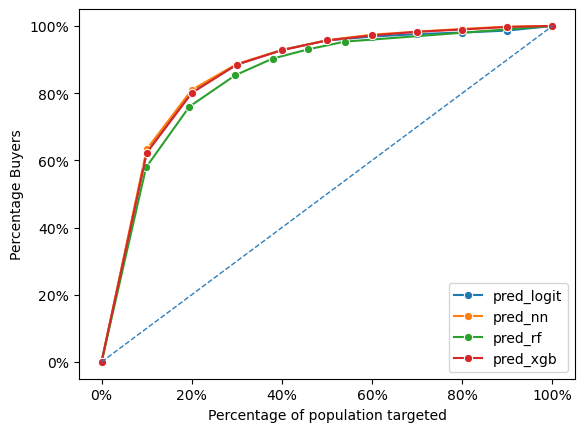

In [103]:
#Gains chart for all models
fig = rsm.gains_plot(
     pentathlon_nptb[pentathlon_nptb.training == 0],
    "buyer",
    "yes",
    ["pred_logit", "pred_nn", "pred_rf", "pred_xgb"],
    qnt=10,
)

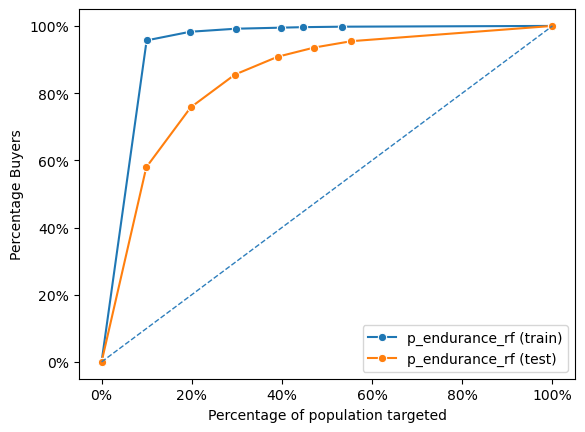

In [104]:
dct = {"train": pentathlon_nptb[pentathlon_nptb.training == 1], "test": pentathlon_nptb[pentathlon_nptb.training == 0]}
fig1 = rsm.gains_plot(dct, "buyer_yes", 1, "p_endurance_rf")

- The Gains Curve for random forest model showing a lot of overfitting, as the training and testing curves are far apart. The model is not generalizing well to new data. This we know because we did not get the oob score prediction for the training data cause the model is overfitting. In this cause it was not an option considering the multiple types of predictions we are doing.

# Next Steps and Recommendations

- Comment on the draft for a new e-mail policy proposal. Are there any weaknesses? Can 
you suggest at least one improvement to the proposal?

The draft of the new email policy proposed by Anna Quintero includes a systematic and data-driven approach to allocate promotional emails, which leverages analytical results to optimize expected profits. Here are some comments and suggestions for improvement:
Strengths of the Policy Proposal:
* 		Data-Driven Decision Making: The policy is grounded in analytics, which should theoretically ensure that the most effective messages are being used, potentially increasing conversion rates and profits.
* 		Dynamic and Adaptive: By reevaluating the data monthly, the strategy remains responsive to changes in customer preferences or the effectiveness of messages.
Potential Weaknesses and Improvements:
* 		Complexity in Execution: The policy may be complex to implement as it requires coordination between departments and constant analysis. Simplifying the allocation process could make it more manageable.Improvement: Introduce an automated system to handle the allocation process, reducing the administrative burden on the analytics team.

* 		Customer Experience: Sending messages from two different departments could confuse customers or lead to customer annoyance leading them to unsubscribe.Improvement: Ensure that the messages are coherent and part of an overarching narrative to avoid customer confusion or fatigue.

* 		Testing and Optimization: The draft doesn't specify if there will be any A/B testing or control groups to continuously test the effectiveness of the email strategies.Improvement: Implement a system of ongoing A/B testing and control groups to validate the analytics model's predictions and refine strategies.
* 		Quantitative Focus: The focus is entirely on expected profits, which might ignore other important factors such as brand loyalty, customer lifetime value, and satisfaction.Improvement: Incorporate qualitative metrics alongside expected profits to balance short-term gains with long-term brand health.

By addressing these potential weaknesses, the policy could be made more robust, ensuring that it not only increases expected profits but also aligns with broader business objectives and maintains a positive customer experience.

# GenAI 

In this assignment, generative AI was generally not very effective compared to other assignments. This was primarily due to the fact that we used pyrsm to create most of the models and the pyrsm package is  not on the ChatGpt environment. So for this assignment, we did not use ChatGpt a lot but on the contrast Co-Pilot was very helpful in writing the code and providing suggestions.

**Graph Distribution Interpretation:**

[Screenshot](genAI_screenshots/graph_interpretation.png)

Since we had to comment on the distribution of expected response across messages, we asked chatGPT to provide us with a summary of the graph. The summary provided by chatGPT was very helpful in understanding the distribution of expected response across messages. We build on it to provide a detailed analysis of the graph.

**ML category mapping:**

[Screenshot](genAI_screenshots/ML_mapping.png)

We asked chatGPT to provide us with mapping when dealing with categorical variables. The mapping provided by chatGPT was very helpful and the method used was a familiar one. We build on it to provide a detailed analysis of the graph.

**One Hot Encoding:**

[Screenshot](genAI_screenshots/one_hot_encoding.png)

We asked chatGPT to provide us with the code for one hot encoding. The code provided by chatGPT was very helpful and the method used (get_dummies) was a familiar one.

**Random Forest Model:**

[Screenshot](genAI_screenshots/rf_overfitting.png)

When working with Random Forest model we had to deal with overfitting. This occured due to the fact that the training did not have ooob score prediction. We tried to work around this by just using the predictions from the pyrsm rf model but that reulted in overfitting. We asked chatGPT to provide us with a solution to this problem. But since chat is not familiar with the pyrsm package, it was not able to provide us with a solution. This was left a bit unexplained. We will take this up with the professor in the next class.